This image is:  <class 'numpy.ndarray'> with dimensions: (985, 1915, 3)
fit_left:  [-3.69905956e-01  9.84000000e+02]
fit_right:  [  0.36990596 276.        ]
fit_bottom:  [  0. 984.]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


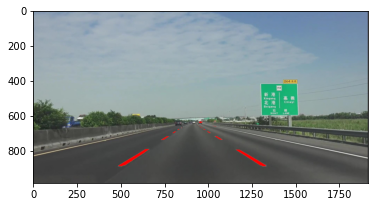

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#read in image
image = mpimg.imread('Color_Selection.jpg')
print('This image is: ', type(image),'with dimensions:',image.shape)

#pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)
line_image = np.copy(image)
color_select = np.copy(image)
# define our color criteria
red_threshold = 150
green_threshold = 150
blue_threshold = 150
rgb_threshold = [red_threshold,green_threshold,blue_threshold]


# Define a triangle 
# origin (0,0)is at upper left 
left_bottom = [0, ysize-1]
right_bottom = [xsize-1, ysize-1]
apex = [int(xsize/2),int(ysize*0.64)]

# fit line (y=mx+b) to identify the 3 sided region of interset
# np.ployfit(x,y,k)  returns the coefficients [m,b]  
#k represent the highest power of k
fit_left = np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]),1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom =np.polyfit((left_bottom[0],right_bottom[0]),(left_bottom[1],right_bottom[1]),1)

print('fit_left: ',fit_left)
print('fit_right: ',fit_right)
print('fit_bottom: ',fit_bottom)
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
color_thresholds = (image[:,:,0]<rgb_threshold[0]) |\
                   (image[:,:,1]<rgb_threshold[1]) | \
                   (image[:,:,2]<rgb_threshold[2])

color_select[color_thresholds]=[0,0,0];
# plt.imshow(color_select)

line_image[~color_thresholds & region_thresholds]=[255,0,0]



print(region_thresholds)
region_select[region_thresholds]=[0,255,0]

plt.imshow(line_image)



[[0 1 2]
 [0 1 2]]
[[0 0 0]
 [1 1 1]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


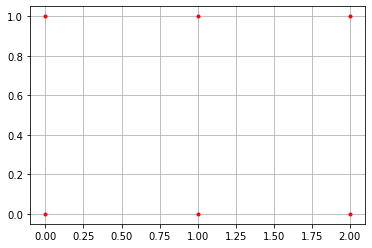

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([0,1,2])
y=np.array([0,1])

X,Y = np.meshgrid(x,y)
print(X)
print(Y)
print(np.arange(0,14))


plt.plot(X,Y,color='red',marker='.',linestyle='')
plt.grid(True)
plt.show()

fit_left:  [ -0.56041667 539.        ]
fit_right:  [0.56158664 0.43841336]
fit_bottom:  [-5.9273638e-17  5.3900000e+02]


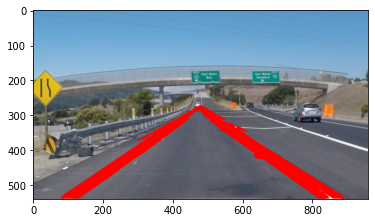

In [2]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2


# Read in and grayscale the image
image = mpimg.imread('canny.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

#pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

# Define a triangle 
# origin (0,0)is at upper left 
left_bottom = [0, ysize-1]
right_bottom = [xsize-1, ysize-1]
apex = [int(xsize/2),int(ysize*0.5)]



# fit line (y=mx+b) to identify the 3 sided region of interset
# np.ployfit(x,y,k)  returns the coefficients [m,b]  
#k represent the highest power of k
fit_left = np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]),1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom =np.polyfit((left_bottom[0],right_bottom[0]),(left_bottom[1],right_bottom[1]),1)

print('fit_left: ',fit_left)
print('fit_right: ',fit_right)
print('fit_bottom: ',fit_bottom)
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

region_select[region_thresholds]=[255,0,0]
plt.imshow(region_select)
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)



# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(0, 0), (imshape[1], 0), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)



# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 10   # minimum number of votes (intersections in Hough grid cell)
min_line_length = 15 #minimum number of pixels making up a line
max_line_gap = 10 # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),20)

# print(line_image);
color_thresholds=(line_image[:,:,0]>0)
# print(color_thresholds)
# print(region_thresholds)
mask_image= np.copy(image)*0
mask_image[color_thresholds & region_thresholds]=[255,0,0]
mask_thresholds=color_thresholds & region_thresholds
mask_image=np.copy(image)
mask_image[mask_thresholds]=[255,0,0]
plt.imshow(mask_image)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 

# plt.imshow(line_image)
